In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.colors as colors
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

def make_facies_log_plot(logs, facies_colors,target, pred):
    logs = logs.sort_values(by='DEPTH')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    # ztop=0; zbot=3500
    
    target = target[target['DEPTH'] <= zbot]
    target = target[target['DEPTH'] >= ztop]
    

    nanval = target['nan'].values
    log = logs['cluster'].values
    predic = logs[pred].values
    top = 600
    bot = 3500
    delta = bot - top
    l = int(len(nanval) * (delta/(zbot-ztop)))
    ttop = np.ceil((ztop-top)/(delta)*l)
    tbot = ttop + len(nanval)
    # print(l, ttop,tbot)
    fasies = []
    prediction = []
    a = 0
    for i in range(l):
      if tbot > i >= ttop :
        if nanval[int(i-ttop)] == False:
          fasies.append(log[a])
          prediction.append(predic[a])
          a = a+1
        else:
          fasies.append(log[a])
          prediction.append(predic[a])
      else:
        fasies.append(np.nan)
        prediction.append(np.nan)

    cluster=np.repeat(np.expand_dims(fasies,1), 100, 1)
    p =np.repeat(np.expand_dims(prediction,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(15, 30))
    plt.subplots_adjust(left=0.1, 
                    right=0.9,  
                    wspace=0.4)
    ax[0].yaxis.set_minor_locator(MultipleLocator(100))
    ax[0].plot(logs.norm_gr, logs.DEPTH, '-g')
    ax[1].plot(np.log10(logs.norm_ResD), logs.DEPTH, '-')
    ax[2].plot(logs.norm_RHOB, logs.DEPTH, '-', color='grey')
    ax3 = ax[2].twiny()
    ax3.plot(logs.NPHI, logs.DEPTH, '-', color='r', lw = 0.5)
    ax[4].plot(logs.PE, logs.DEPTH, '-', color='black')
    ax[3].plot(logs.norm_DTS, logs.DEPTH, '-', color='m')
    
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin = 0, vmax = 3)
    im=ax[6].imshow(p, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin = 0, vmax = 3)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    ax[5].set_xlabel("Fasies")
    ax[5].xaxis.set_label_position("top")
    ax[6].set_xlabel("Predicton")
    ax[6].xaxis.set_label_position("top")
    for i in range(len(ax)-2):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)


    ax[0].set_xlabel("GR_NORM")
    ax[0].set_xlim(0,100)
    ax[0].tick_params(axis='x', colors="green")
    ax[0].spines["top"].set_edgecolor("green")
    ax[0].title.set_color('green')
    ax[0].grid(which='major', color='lightgrey', linestyle='-')
    ax[0].xaxis.set_ticks_position("top")
    ax[0].xaxis.set_label_position("top")
    ax[0].spines["top"].set_position(("axes", 1.02))
    
    ax[1].set_xlabel("ResD")
    ax[1].set_xscale('log')
    ax[1].set_xlim(0,np.log10(200))
    # ax[1].set_xticks([0.01, 0.1, 1])
    ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax[1].tick_params(axis='x', colors="b")
    ax[1].spines["top"].set_edgecolor("b")
    ax[1].title.set_color('b')
    ax[1].grid(which='major', color='lightgrey', linestyle='-')
    ax[1].xaxis.set_ticks_position("top")
    ax[1].xaxis.set_label_position("top")
    ax[1].spines["top"].set_position(("axes", 1.02))

    ax[2].set_xlabel("RHOB")
    ax[2].set_xlim(1.7,2.7)
    ax[2].set_xticks([1.7, 2.2, 2.7])
    ax[2].tick_params(axis='x', colors="grey")
    ax[2].spines["top"].set_edgecolor("grey")
    ax[2].title.set_color('r')
    ax[2].grid(which='major', color='lightgrey', linestyle='-')
    ax[2].xaxis.set_ticks_position("top")
    ax[2].xaxis.set_label_position("top")
    ax[2].spines["top"].set_position(("axes", 1.02))
    
    ax3.set_xlabel("NPHI")
    ax3.set_xlim(0.6,0)
    ax3.set_xticks([0.6, 0.3, 0])
    ax3.tick_params(axis='x', colors="r")
    ax3.spines["top"].set_edgecolor("r")
    ax3.title.set_color('green')
    ax3.grid(which='major', color='lightgrey', linestyle='-')
    ax3.xaxis.set_ticks_position("top")
    ax3.xaxis.set_label_position("top")
    ax3.spines["top"].set_position(("axes", 1.05))
    
    ax[3].set_xlabel("DTS")
    ax[3].set_xlim(340,40)
    ax[3].set_xticks([40, 140, 240])
    ax[3].tick_params(axis='x', colors="m")
    ax[3].spines["top"].set_edgecolor("m")
    ax[3].title.set_color('m')
    ax[3].grid(which='major', color='lightgrey', linestyle='-')
    ax[3].xaxis.set_ticks_position("top")
    ax[3].xaxis.set_label_position("top")
    ax[3].spines["top"].set_position(("axes", 1.02))
    
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(0,20)
    ax[4].tick_params(axis='x', colors="black")
    ax[4].spines["top"].set_edgecolor("black")
    ax[4].title.set_color('black')
    ax[4].grid(which='major', color='lightgrey', linestyle='-')
    ax[4].xaxis.set_ticks_position("top")
    ax[4].xaxis.set_label_position("top")
    ax[4].spines["top"].set_position(("axes", 1.02))
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]);
    ax[5].set_yticklabels([]);
    ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=1)

def make_facies_log_plot_all(logs, facies_colors,target, pred):
    logs = logs.sort_values(by='DEPTH')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    # ztop=0; zbot=3500
    
    target = target[target['DEPTH'] <= zbot]
    target = target[target['DEPTH'] >= ztop]

    nanval = target['nan'].values
    log = logs['cluster'].values
    predic_SVM = logs[pred[0]].values
    predic_RF = logs[pred[1]].values
    predic_XGB = logs[pred[2]].values

    top = 600
    bot = 3500
    delta = bot - top
    l = int(len(nanval) * (delta/(zbot-ztop)))
    ttop = np.ceil((ztop-top)/(delta)*l)
    tbot = ttop + len(nanval)
    # print(l, ttop,tbot)
    fasies = []
    prediction1 = []
    prediction2 = []
    prediction3 = []

    a = 0
    for i in range(l):
      if tbot > i >= ttop :
        if nanval[int(i-ttop)] == False:
          fasies.append(log[a])
          prediction1.append(predic_SVM[a])
          prediction2.append(predic_RF[a])
          prediction3.append(predic_XGB[a])
          a = a+1
        else:
          fasies.append(log[a])
          prediction1.append(predic_SVM[a])
          prediction2.append(predic_RF[a])
          prediction3.append(predic_XGB[a])
      else:
          fasies.append(np.nan)
          prediction1.append(np.nan)
          prediction2.append(np.nan)
          prediction3.append(np.nan)

    cluster=np.repeat(np.expand_dims(fasies,1), 100, 1)
    p1 =np.repeat(np.expand_dims(prediction1,1), 100, 1)
    p2 =np.repeat(np.expand_dims(prediction2,1), 100, 1)
    p3 =np.repeat(np.expand_dims(prediction3,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=9, figsize=(15, 30))
    plt.subplots_adjust(left=0.1, 
                    right=0.9,  
                    wspace=0.4)
    ax[0].yaxis.set_minor_locator(MultipleLocator(100))
    ax[0].plot(logs.norm_gr, logs.DEPTH, '-g')
    ax[1].plot(np.log10(logs.norm_ResD), logs.DEPTH, '-')
    ax[2].plot(logs.norm_RHOB, logs.DEPTH, '-', color='grey')
    ax3 = ax[2].twiny()
    ax3.plot(logs.NPHI, logs.DEPTH, '-', color='r', lw = 0.5)
    ax[4].plot(logs.PE, logs.DEPTH, '-', color='black')
    ax[3].plot(logs.norm_DTS, logs.DEPTH, '-', color='m')
    
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin = 0, vmax = 3)
    im=ax[6].imshow(p1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin = 0, vmax = 3)
    im=ax[7].imshow(p2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin = 0, vmax = 3)
    im=ax[8].imshow(p3, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin = 0, vmax = 3)
    
    divider = make_axes_locatable(ax[8])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    ax[5].set_xlabel("Fasies")
    ax[5].xaxis.set_label_position("top")
    ax[6].set_xlabel("SVM")
    ax[6].xaxis.set_label_position("top")
    ax[7].set_xlabel("RandomF")
    ax[7].xaxis.set_label_position("top")
    ax[8].set_xlabel("XGboost")
    ax[8].xaxis.set_label_position("top")
    
    for i in range(len(ax)-4):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)


    ax[0].set_xlabel("GR_NORM")
    ax[0].set_xlim(0,100)
    ax[0].tick_params(axis='x', colors="green")
    ax[0].spines["top"].set_edgecolor("green")
    ax[0].title.set_color('green')
    ax[0].grid(which='major', color='lightgrey', linestyle='-')
    ax[0].xaxis.set_ticks_position("top")
    ax[0].xaxis.set_label_position("top")
    ax[0].spines["top"].set_position(("axes", 1.02))
    
    ax[1].set_xlabel("ResD")
    ax[1].set_xscale('log')
    ax[1].set_xlim(0,np.log10(200))
    # ax[1].set_xticks([0.01, 0.1, 1])
    ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax[1].tick_params(axis='x', colors="b")
    ax[1].spines["top"].set_edgecolor("b")
    ax[1].title.set_color('b')
    ax[1].grid(which='major', color='lightgrey', linestyle='-')
    ax[1].xaxis.set_ticks_position("top")
    ax[1].xaxis.set_label_position("top")
    ax[1].spines["top"].set_position(("axes", 1.02))

    ax[2].set_xlabel("RHOB")
    ax[2].set_xlim(1.7,2.7)
    ax[2].set_xticks([1.7, 2.2, 2.7])
    ax[2].tick_params(axis='x', colors="grey")
    ax[2].spines["top"].set_edgecolor("grey")
    ax[2].title.set_color('r')
    ax[2].grid(which='major', color='lightgrey', linestyle='-')
    ax[2].xaxis.set_ticks_position("top")
    ax[2].xaxis.set_label_position("top")
    ax[2].spines["top"].set_position(("axes", 1.02))
    
    ax3.set_xlabel("NPHI")
    ax3.set_xlim(0.6,0)
    ax3.set_xticks([0.6, 0.3, 0])
    ax3.tick_params(axis='x', colors="r")
    ax3.spines["top"].set_edgecolor("r")
    ax3.title.set_color('green')
    ax3.grid(which='major', color='lightgrey', linestyle='-')
    ax3.xaxis.set_ticks_position("top")
    ax3.xaxis.set_label_position("top")
    ax3.spines["top"].set_position(("axes", 1.05))
    
    ax[3].set_xlabel("DTS")
    ax[3].set_xlim(340,40)
    ax[3].set_xticks([40, 140, 240])
    ax[3].tick_params(axis='x', colors="m")
    ax[3].spines["top"].set_edgecolor("m")
    ax[3].title.set_color('m')
    ax[3].grid(which='major', color='lightgrey', linestyle='-')
    ax[3].xaxis.set_ticks_position("top")
    ax[3].xaxis.set_label_position("top")
    ax[3].spines["top"].set_position(("axes", 1.02))
    
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(0,20)
    ax[4].tick_params(axis='x', colors="black")
    ax[4].spines["top"].set_edgecolor("black")
    ax[4].title.set_color('black')
    ax[4].grid(which='major', color='lightgrey', linestyle='-')
    ax[4].xaxis.set_ticks_position("top")
    ax[4].xaxis.set_label_position("top")
    ax[4].spines["top"].set_position(("axes", 1.02))
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]);
    ax[5].set_yticklabels([]);
    ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_yticklabels([])
    ax[7].set_xticklabels([])
    ax[8].set_yticklabels([])
    ax[8].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=1)

In [ ]:
def con_mat(conf, conv):
  plt.figure(figsize = (20,10))
  plt.subplot(121)
  at = sns.heatmap(conf, annot=True, fmt='d', cbar=False)
  plt.xlabel('Predict')
  plt.ylabel('True')
  plt.title('Accuracy train = {}'.format(accuracy(conf)))
  bottom, top = at.get_ylim()
  at.set_ylim(bottom+0.5, top-0.5)
  plt.subplot(122)
  at = sns.heatmap(conv, annot=True, fmt='d', cbar=False)
  plt.xlabel('Predict')
  plt.ylabel('True')
  plt.title('Accuracy validation = {}'.format(accuracy(conv)))
  bottom, top = at.get_ylim()
  at.set_ylim(bottom+0.5, top-0.5)
  plt.show()

Read Data

In [ ]:
data = pd.read_csv('fix.csv',sep = ",")
column = ['DEPTH', 'norm_ResD', 'norm_RHOB', 'NPHI', 'norm_DTS','PE', 'norm_gr','WELL','cluster']
feature = [ 'norm_ResD', 'norm_RHOB', 'NPHI', 'norm_DTS', 'norm_gr', "PE"]
data = data[column]
train = data[(data['WELL'] != 'BROOKLYN_10') & (data['WELL'] != 'MANHATTAN_7')]
test1  = data[(data['WELL'] == 'BROOKLYN_10')]
test2  = data[(data['WELL'] == 'MANHATTAN_7')]
test =  pd.concat([test1,test2], axis=0)

In [ ]:
test

,DEPTH,norm_ResD,norm_RHOB,NPHI,norm_DTS,PE,norm_gr,WELL,cluster
0,730.75,1.092111,1.824584,0.4508,213.835045,8.02,38.749449,BROOKLYN_10,2
1,731.00,1.650533,1.816875,0.4663,211.635593,8.21,40.202341,BROOKLYN_10,2
2,731.25,2.808966,1.808086,0.4770,209.050669,8.41,40.603616,BROOKLYN_10,2
3,731.50,4.705377,1.821423,0.4779,206.715169,8.64,41.212447,BROOKLYN_10,2
4,731.75,7.013833,1.841929,0.4688,203.790124,8.90,42.499294,BROOKLYN_10,3
...,...,...,...,...,...,...,...,...,...
19288,2000.50,1.371885,2.008195,0.5197,223.238047,6.37,53.062914,MANHATTAN_7,0
19289,2000.75,1.446392,2.009704,0.5296,222.457165,6.05,53.115249,MANHATTAN_7,0
19290,2001.00,1.520899,2.011214,0.5395,221.676282,5.72,53.154501,MANHATTAN_7,0
19291,2001.25,1.532400,2.010711,0.5515,222.392091,5.47,52.971326,MANHATTAN_7,0


In [ ]:
target = pd.read_csv('nan_2.csv')
target['nan'] = np.array(target.isna().any(axis=1))

target['WELL'] = target["WELL"].replace("MONTANA", "MONTANA_3")
target['WELL'] = target["WELL"].replace("BRONX", "BRONX_2")
target['WELL'] = target["WELL"].replace("BERKELEY", "BERKELEY_4")
target['WELL'] = target["WELL"].replace("MEMPHIS", "MEMPHIS_1")
target['WELL'] = target["WELL"].replace("PORTOBELLO", "PORTOBELLO_5")

target_train = target[(target['WELL'] != 'BROOKLYN_10') & (target['WELL'] != 'MANHATTAN_7')]
target_test1 = target[(target['WELL'] == 'BROOKLYN_10')]
target_test2 = target[(target['WELL'] == 'MANHATTAN_7')]
target_test =  pd.concat([target_test1,target_test2], axis=0)

facies_colors = ['#686868', '#1e6432','#F4D03F','#a12b2f']

In [ ]:

if False in target_test['nan'].values:
  print('uhuy')

uhuy


Data Correlation

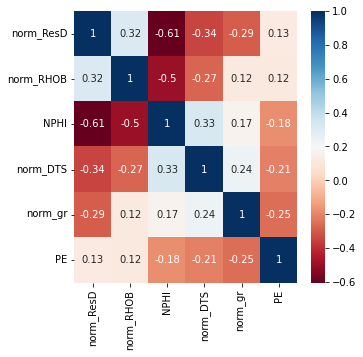

In [ ]:
corr = train[feature].corr()
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, cmap='RdBu', annot=True)
plt.xticks((np.arange(len(corr.columns)))+0.5, corr.columns)
plt.yticks((np.arange(len(corr.columns)))+0.5, corr.columns)
plt.show()

In [ ]:
test.corr().cluster

DEPTH       -0.172642
norm_ResD    0.400212
norm_RHOB    0.360917
NPHI        -0.386033
norm_DTS    -0.341083
PE           0.300771
norm_gr     -0.546726
cluster      1.000000
Name: cluster, dtype: float64

In [ ]:
test.corr().cluster.abs().sort_values(ascending=False)

cluster      1.000000
norm_gr      0.546726
norm_ResD    0.400212
NPHI         0.386033
norm_RHOB    0.360917
norm_DTS     0.341083
PE           0.300771
DEPTH        0.172642
Name: cluster, dtype: float64

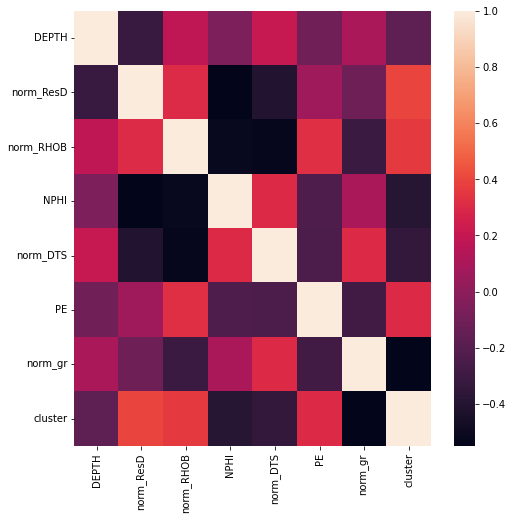

In [ ]:
plt.figure(figsize=(8,8))
corr_matrix = test.corr()
heatmap = sns.heatmap(corr_matrix);
figure = heatmap.get_figure()
figure.savefig('heatmap.png', dpi=1000)

Data Augmentation

In [ ]:
def power(data,feature):
  feature = list(feature)
  for i in range(len(feature)):
    data['{}^2'.format(feature[i])] = data[feature[i]].values**2
    feature.append('{}^2'.format(feature[i]))
  return data,feature

def sqrt(data,feature):
  feature = list(feature)
  for i in range(len(feature)):
    data['{}^0.5'.format(feature[i])] = data[feature[i]].values**0.5
    feature.append('{}^0.5'.format(feature[i]))
  return data,feature

def log(data,feature):
  feature = list(feature)
  for i in range(len(feature)):
    data['{}_log'.format(feature[i])] = np.log10(data[feature[i]].values)
    feature.append('{}_log'.format(feature[i]))
  return data,feature

In [ ]:
# train, feature = power(train,feature)
# train, feature = sqrt(train,feature)
# train, feature = log(train,feature)
# train

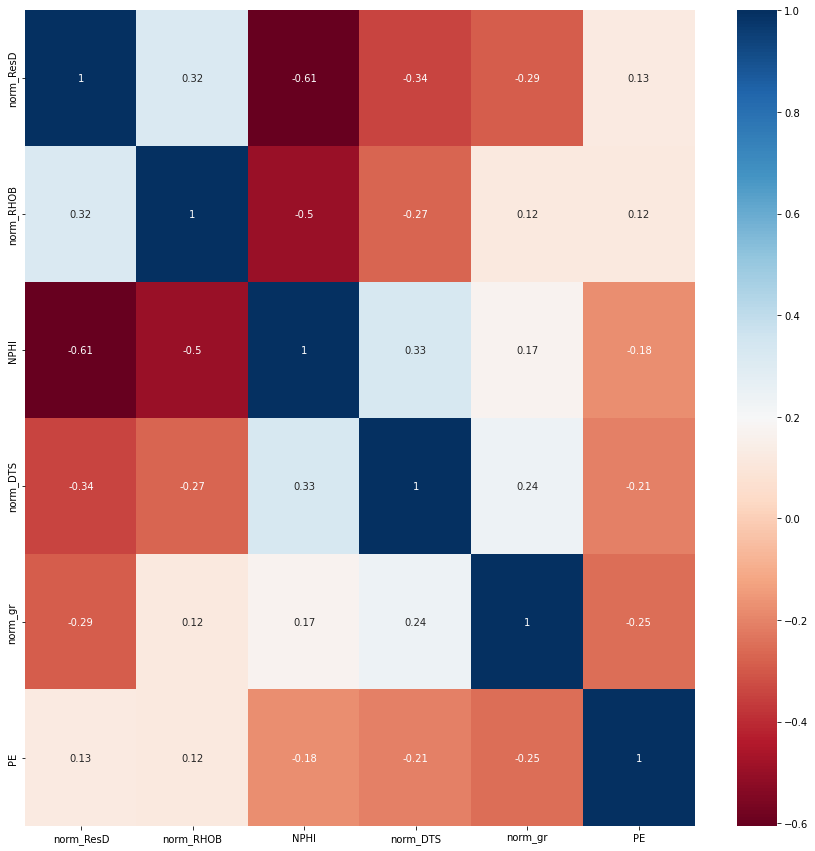

In [ ]:
corr = train[feature].corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True)
plt.xticks((np.arange(len(corr.columns)))+0.5, corr.columns)
plt.yticks((np.arange(len(corr.columns)))+0.5, corr.columns)
plt.show()

Normalize Data

In [ ]:
X = train[feature].values
y = train['cluster'].values


scaler = StandardScaler().fit(X)
scaled_features = scaler.transform(X)

Split Data

In [ ]:
X_train, X_val,y_train,y_val = train_test_split(scaled_features,y,test_size= 0.2,random_state=42)

SVM

Gridsearch

In [ ]:
from sklearn.svm import SVC
# svm_model = SVC(random_state = 12)
# param_grid_svm = {
#             'C' : [0.01, 0.1, 1, 10, 100],
#             'gamma': [1, 0.1, 0.0001]
#             }

# CV_svm_model = GridSearchCV(estimator = svm_model, param_grid = param_grid_svm , scoring = 'accuracy', verbose = 1, n_jobs = -1)
# CV_svm_model.fit(X_train, y_train)

# best_parameters = CV_svm_model.best_params_
# print('The best parameters for using this model is', best_parameters)

Random Search SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(random_state = 12)
param_grid_svm = {
            'C' : [0.01, 0.1, 1, 10, 100],
            'gamma': [1, 0.1, 0.0001]
            }

CV_svm_model = RandomizedSearchCV(estimator = svm_model, param_distributions = param_grid_svm , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_svm_model.fit(X_train, y_train)

best_parameters = CV_svm_model.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters for using this model is {'gamma': 1, 'C': 100}


Training Data

In [ ]:
CV_svm_model = SVC(C = best_parameters['C'], 
                                gamma = best_parameters['gamma'],
                                random_state = 12)

CV_svm_model.fit(X_train, y_train)

predt_CSV = CV_svm_model.predict(X_train)
predv_CSV = CV_svm_model.predict(X_val)

cont_CSV = confusion_matrix(y_train, predt_CSV)
conv_CSV = confusion_matrix(y_val, predv_CSV)

predal_CSV = CV_svm_model.predict(scaled_features)

train['pred_CSV'] = predal_CSV


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Confusing Matrix

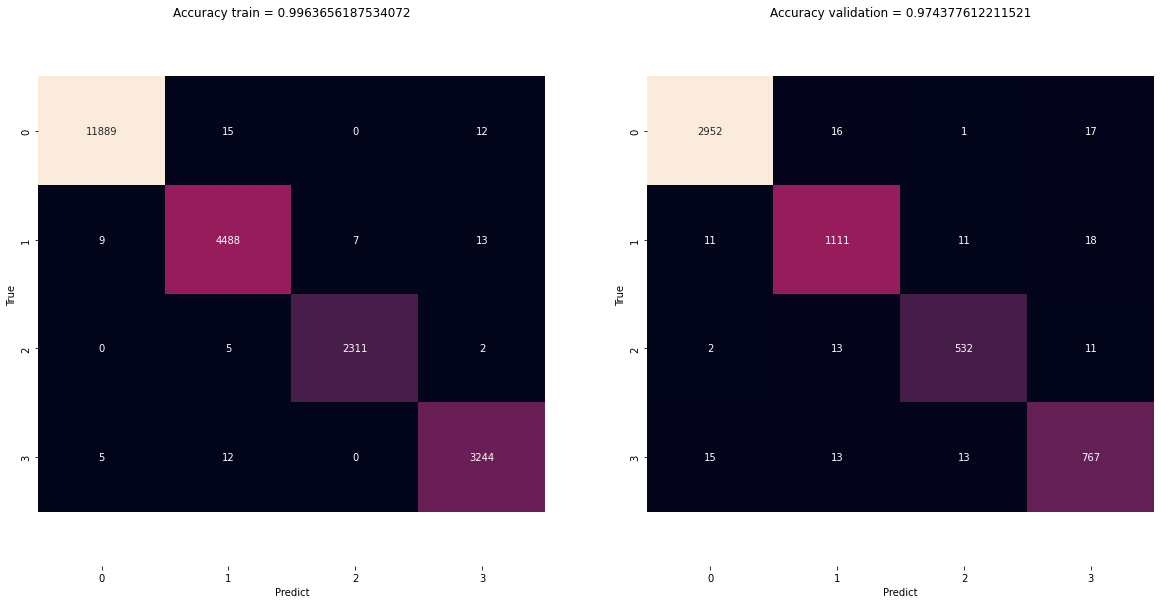

In [ ]:
con_mat(cont_CSV, conv_CSV)
figure.savefig('conf_svm.png', dpi=1000)

Training Report SVM

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
cv_svm = cross_val_score(estimator = CV_svm_model, X = X_train, y = y_train, cv = 10)


y_pred_svm_train = CV_svm_model.predict(X_train)
r2_score_svm_train = r2_score(y_train, y_pred_svm_train)

y_pred_svm_test = CV_svm_model.predict(X_val)
r2_score_svm_test = r2_score(y_val, y_pred_svm_test)

rmse_svm = (np.sqrt(mean_squared_error(y_val, y_pred_svm_test)))
print("CV: ", cv_svm.mean())
print('R2_score (train): ', r2_score_svm_train)
print('R2_score (test): ', r2_score_svm_test)
print("RMSE: ", rmse_svm)

CV:  0.9670180675037893
R2_score (train):  0.9891612658777373
R2_score (test):  0.9250321275632434
RMSE:  0.30112756782216


In [ ]:
f1_score_svm_training = metrics.accuracy_score(y_train, y_pred_svm_train)
f1_score_svm_testing = metrics.accuracy_score(y_val, y_pred_svm_test)

In [ ]:
print('The accuracy of the SVM Training Set using all variables is:',accuracy(cont_CSV))  
print (classification_report(y_train, y_pred_svm_train))

print('The accuracy of the SVM Testing Set using all variables is:',accuracy(conv_CSV))  
print (classification_report(y_val, y_pred_svm_test))

The accuracy of the SVM Training Set using all variables is: 0.9963656187534072
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11916
           1       0.99      0.99      0.99      4517
           2       1.00      1.00      1.00      2318
           3       0.99      0.99      0.99      3261

    accuracy                           1.00     22012
   macro avg       1.00      1.00      1.00     22012
weighted avg       1.00      1.00      1.00     22012

The accuracy of the SVM Testing Set using all variables is: 0.974377612211521
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2986
           1       0.96      0.97      0.96      1151
           2       0.96      0.95      0.95       558
           3       0.94      0.95      0.95       808

    accuracy                           0.97      5503
   macro avg       0.96      0.96      0.96      5503
weighted avg       0.97    

Predict Target


In [ ]:
X_target = test[feature].values

scaled_target_csv = scaler.transform(X_target)
predtarget_CSV = CV_svm_model.predict(scaled_target_csv)

test['pred_SVM'] = predtarget_CSV

Visualization


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


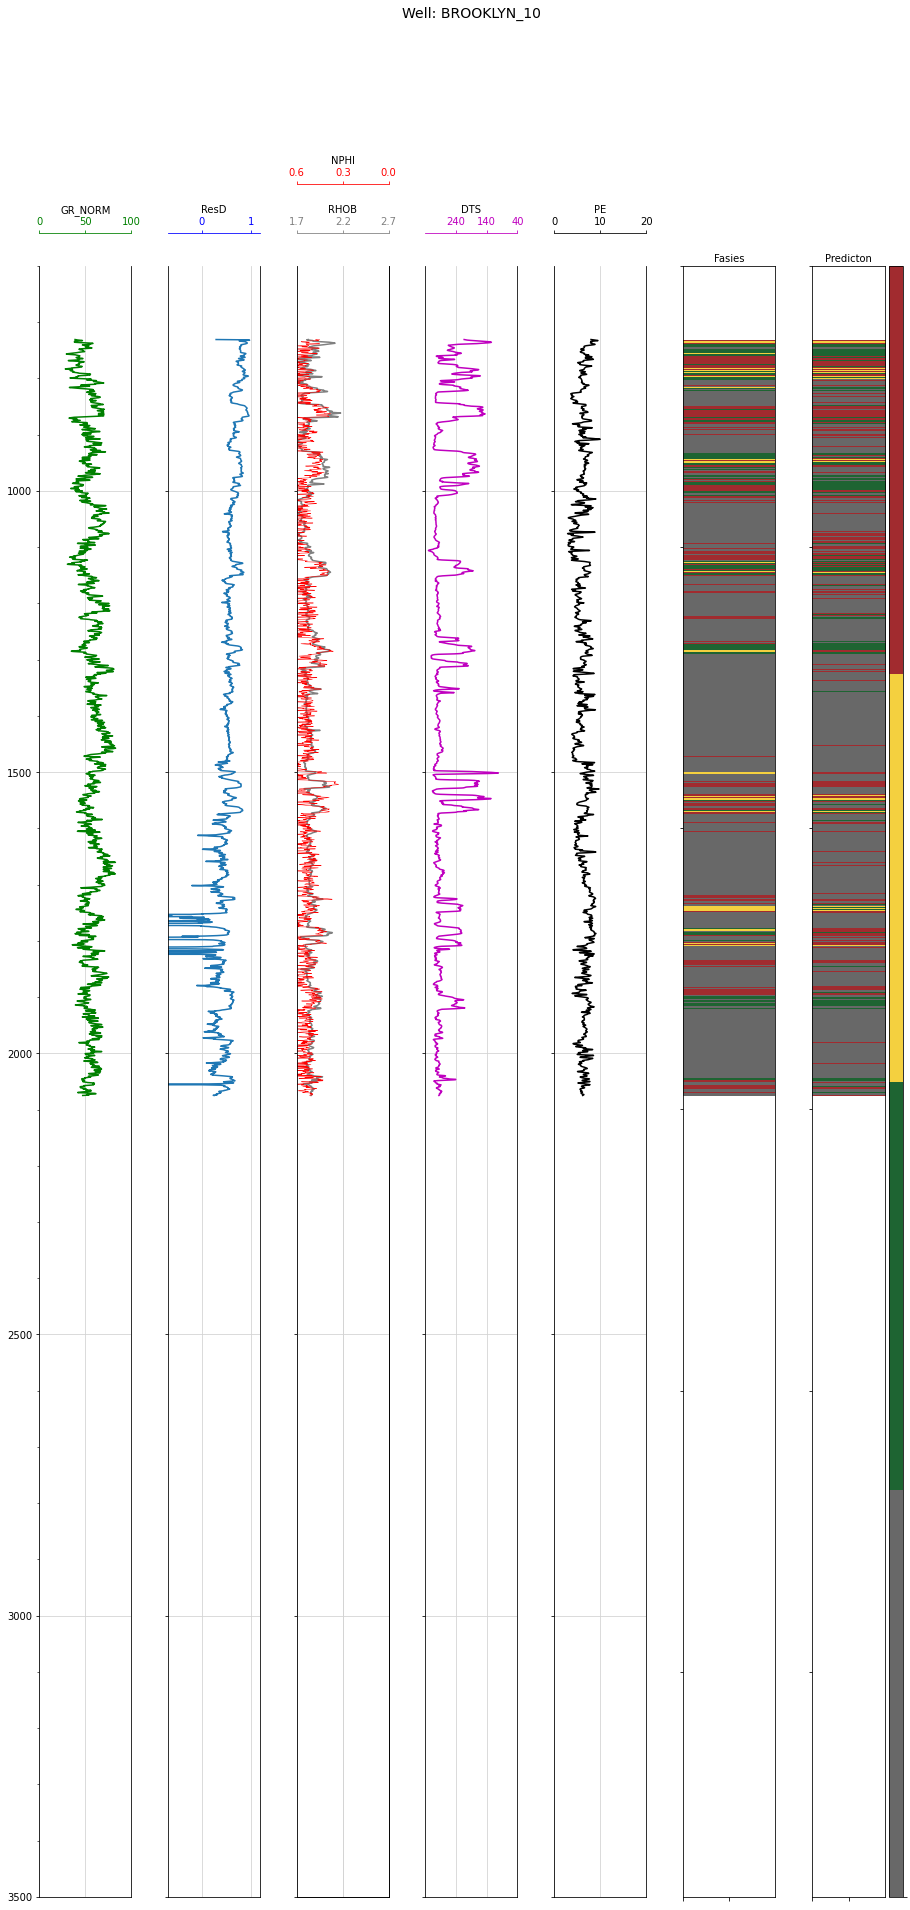

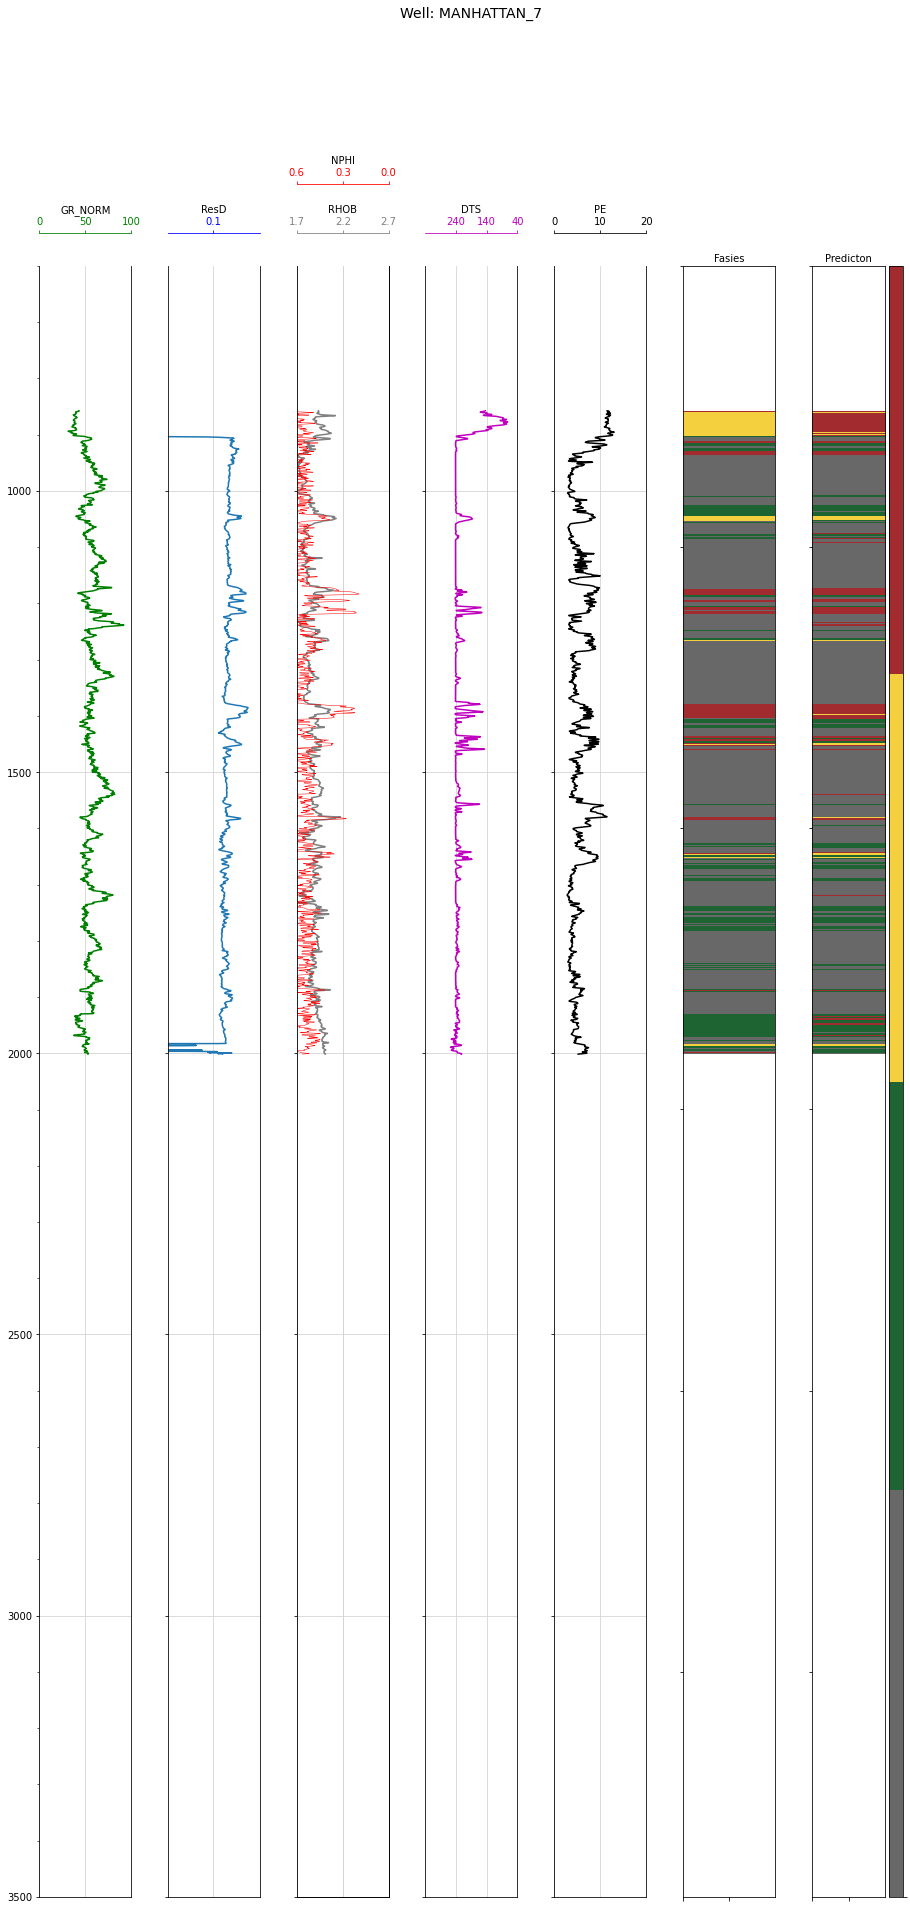

In [ ]:
for i in np.unique(test['WELL']):
  make_facies_log_plot(
      test[test['WELL']==i],
      facies_colors=facies_colors, target = target_test[target_test['WELL']==i] ,pred = 'pred_SVM')

Random Forest

Grid Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# param_grid_rf = {
#     'n_estimators': [10,30,50,70,90,100]
# }
# rf = RandomForestClassifier()
# CV_rf_model = GridSearchCV(estimator = rf, param_grid = param_grid_rf, scoring = 'accuracy', n_jobs = -1, verbose = 1)
# CV_rf_model.fit(X_train, y_train)
# best_parameters_rf = CV_rf_model.best_params_
# print('The best parameters for using this model is', best_parameters_rf)

Random Search RF

In [ ]:
param_grid_rf = {
    'n_estimators': [10,30,50,70,90,100]
}
rf = RandomForestClassifier()
CV_rf_model = RandomizedSearchCV(estimator = rf, param_distributions= param_grid_rf, scoring = 'accuracy', n_jobs = -1, verbose = 1)
CV_rf_model.fit(X_train, y_train)
best_parameters_rf = CV_rf_model.best_params_
print('The best parameters for using this model is', best_parameters_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 6 candidates, totalling 30 fits
The best parameters for using this model is {'n_estimators': 100}


In [ ]:
CV_rf_model = RandomForestClassifier(n_estimators = best_parameters_rf['n_estimators'],
                                random_state = 12)

CV_rf_model.fit(X_train, y_train)

predt_RF = CV_rf_model.predict(X_train)
predv_RF = CV_rf_model.predict(X_val)

cont_RF = confusion_matrix(y_train, predt_RF)
conv_RF = confusion_matrix(y_val, predv_RF)

predal_RF = CV_rf_model.predict(scaled_features)


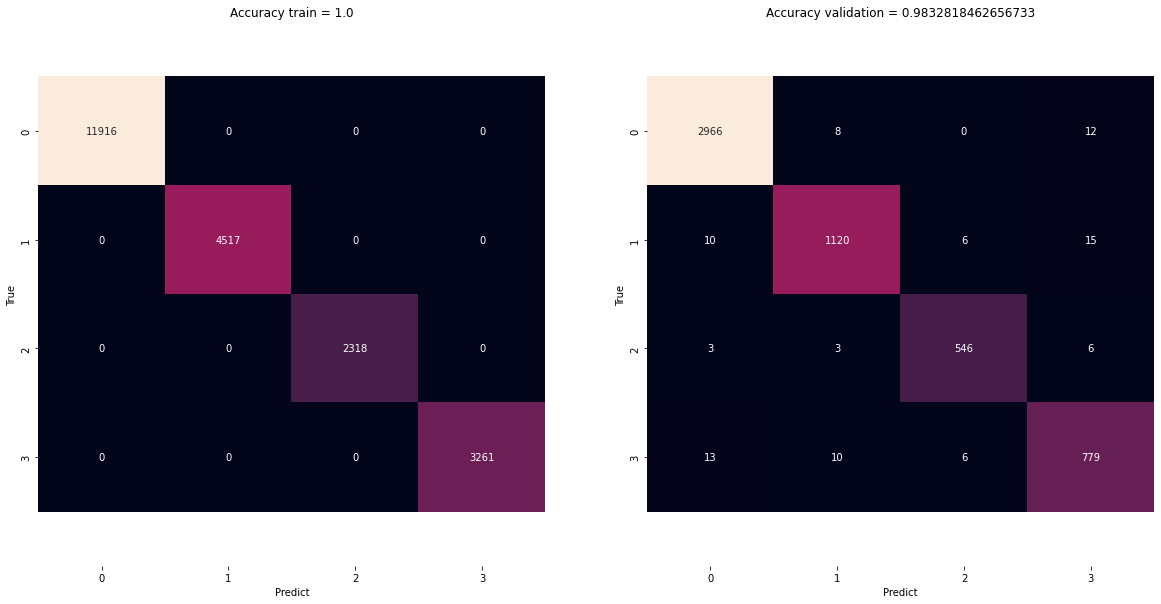

In [ ]:
con_mat(cont_RF, conv_RF)
figure.savefig('conf_rf.png', dpi=2500)

Training Report RF

In [ ]:
cv_rf = cross_val_score(estimator = CV_rf_model, X = X_train, y = y_train, cv = 10)

y_pred_rf_train = CV_rf_model.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = CV_rf_model.predict(X_val)
r2_score_rf_test = r2_score(y_val, y_pred_rf_test)

rmse_rf = (np.sqrt(mean_squared_error(y_val, y_pred_rf_test)))
print("CV: ", cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.9813738986613714
R2_score (train):  1.0
R2_score (test):  0.9435111822921433
RMSE:  0.2613931281345094


In [ ]:
f1_score_rf_training = metrics.accuracy_score(y_train, y_pred_rf_train)
f1_score_rf_testing = metrics.accuracy_score(y_val, y_pred_rf_test)

In [ ]:
print('The accuracy of the Random Forest Training Set using all variables is:',accuracy(cont_RF))  
print (classification_report(y_train, y_pred_rf_train))

print('The accuracy of the Random Forest Testing Set using all variables is:',accuracy(conv_RF))  
print (classification_report(y_val, y_pred_rf_test))

The accuracy of the Random Forest Training Set using all variables is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11916
           1       1.00      1.00      1.00      4517
           2       1.00      1.00      1.00      2318
           3       1.00      1.00      1.00      3261

    accuracy                           1.00     22012
   macro avg       1.00      1.00      1.00     22012
weighted avg       1.00      1.00      1.00     22012

The accuracy of the Random Forest Testing Set using all variables is: 0.9832818462656733
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2986
           1       0.98      0.97      0.98      1151
           2       0.98      0.98      0.98       558
           3       0.96      0.96      0.96       808

    accuracy                           0.98      5503
   macro avg       0.98      0.98      0.98      5503
weighted avg       0.

In [ ]:
def plot_learning_curve(estimator, title, x, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

In [ ]:
# plot_learning_curve(CV_rf_model, 'Learning Curve for Random Forest Model', X, y, (0.85,1.05), 10)
# plt.show()

In [ ]:
# data_vars = test.columns.values.tolist()
# y_vars = ['cluster']
# x_vars = [i for i in data_vars if i not in y_vars]
# X_ = np.array(x_vars)
# importance_score = rf.feature_importances_
# indices = np.argsort(importance_score)

# feature_importance = pd.Series(rf.feature_importances_, index = x_vars)
# feature_importance.nlargest(31).plot(kind = 'barh', figsize=(15,12))

In [ ]:
X_target = test[feature].values

scaled_target_RF = scaler.transform(X_target)
predtarget_RF = CV_rf_model.predict(scaled_target_RF)

test['pred_RF'] = predtarget_RF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


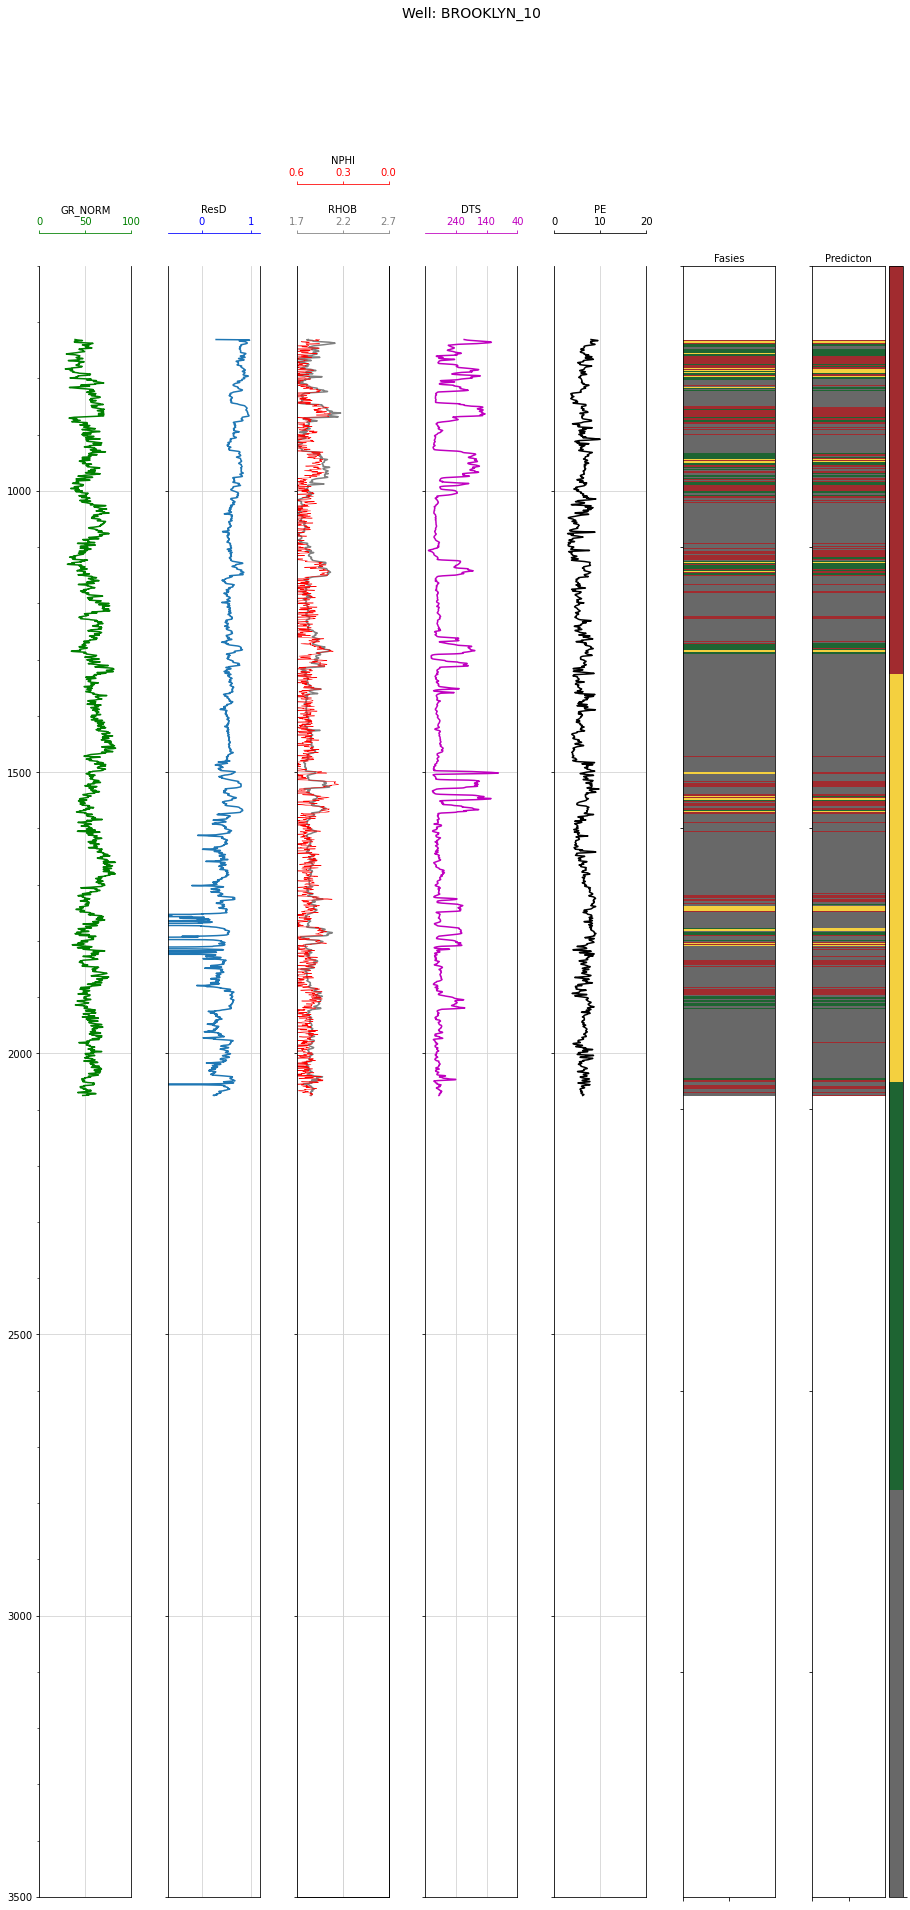

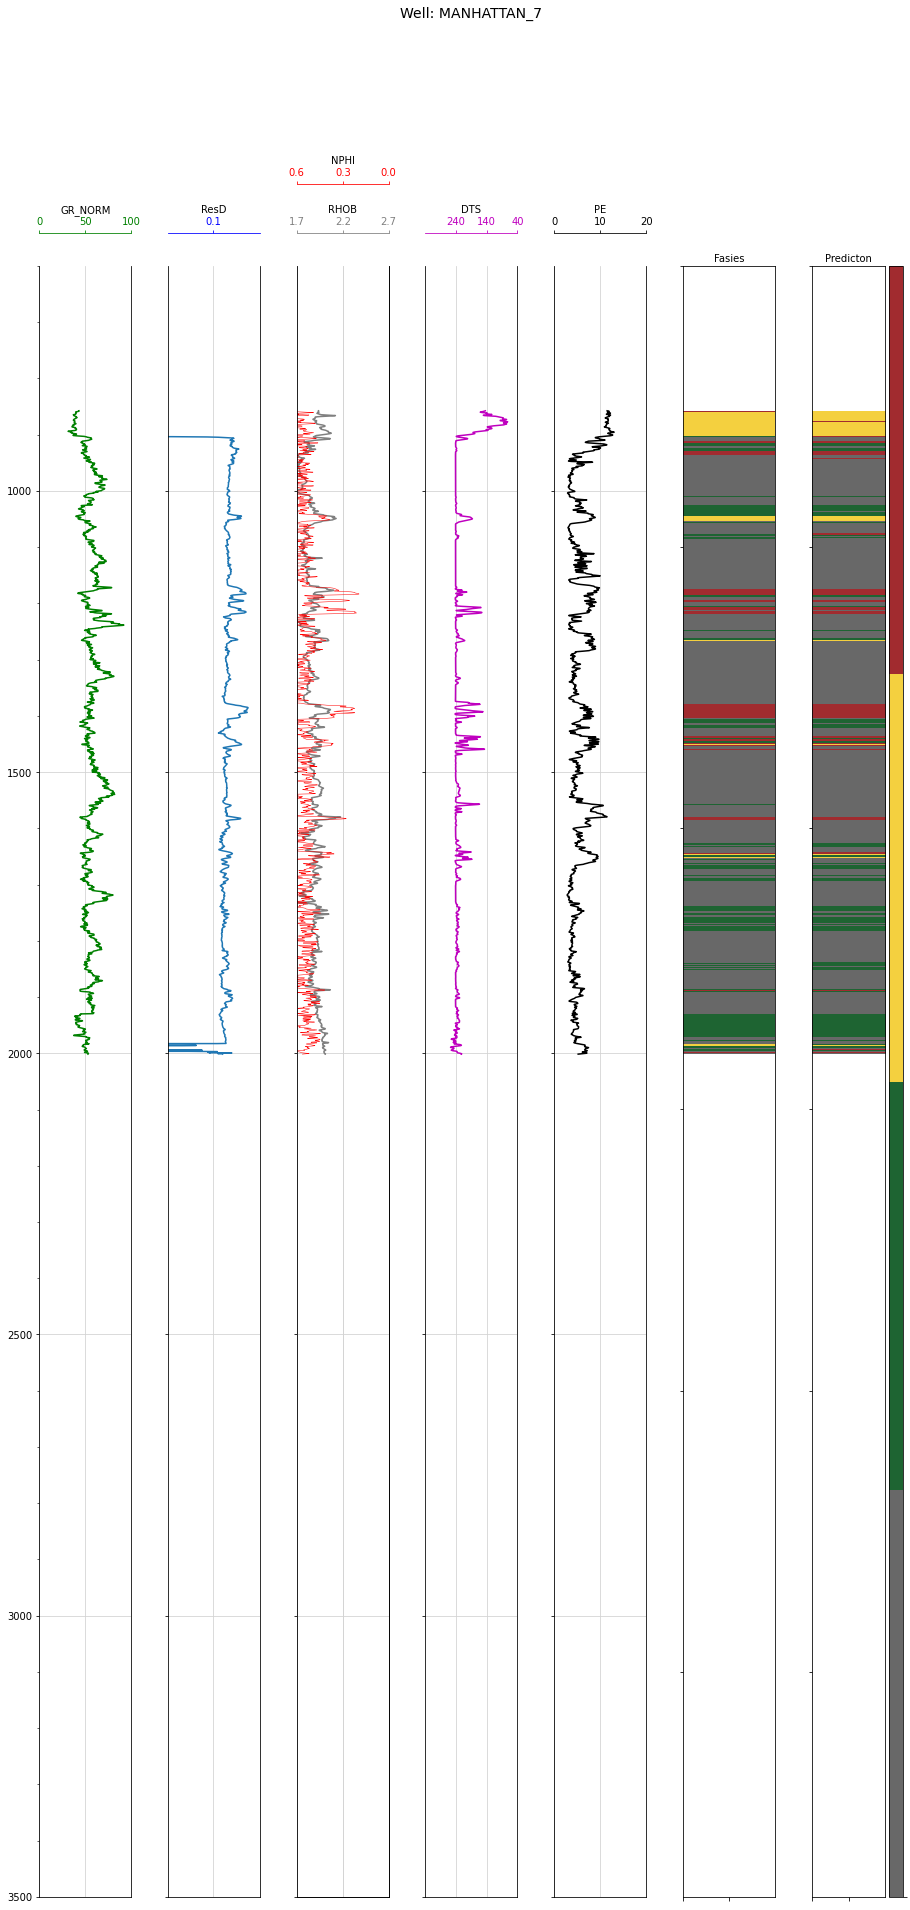

In [ ]:
for i in np.unique(test['WELL']):
  make_facies_log_plot(
      test[test['WELL']==i],
      facies_colors=facies_colors, target = target_test[target_test['WELL']==i] ,pred = 'pred_RF')

XGB

grid Search

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# params_grid_xgb = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'max_depth': [3, 4, 5]
#         }
# params_grid_xgb = {
        
#         'gamma': [0.5, 1, 2]
#         }
# xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                     silent=True, nthread=1)

# CV_xgb_model = GridSearchCV(estimator = xgb, param_grid = params_grid_xgb, scoring = 'accuracy', n_jobs = -1, verbose = 1)
# CV_xgb_model.fit(X_train, y_train)
# best_parameters_xgb = CV_xgb_model.best_params_


Random Search XGB

In [ ]:
params_grid_xgb = {
        
        'gamma': [0.5, 1, 2]
        }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

CV_xgb_model = RandomizedSearchCV(estimator = xgb, param_distributions= params_grid_xgb, scoring = 'accuracy', n_jobs = -1, verbose = 1)
CV_xgb_model.fit(X_train, y_train)
best_parameters_xgb = CV_xgb_model.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
print('The best parameters for using this model is', best_parameters_xgb)

The best parameters for using this model is {'gamma': 2}


In [ ]:
# CV_xgb_model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                     silent=True, nthread=1, min_child = best_parameters_xgb['min_child_weight'], gamma = best_parameters_xgb['gamma'],
#                     max_depth = best_parameters_xgb['max_depth'])
CV_xgb_model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1,  gamma = best_parameters_xgb['gamma'])

CV_xgb_model.fit(X_train, y_train)

predt_XGB = CV_xgb_model.predict(X_train)
predv_XGB = CV_xgb_model.predict(X_val)

cont_XGB = confusion_matrix(y_train, predt_XGB)
conv_XGB = confusion_matrix(y_val, predv_XGB)

predal_XGB = CV_xgb_model.predict(scaled_features)

# train['pred_xgb'] = predal_XGB


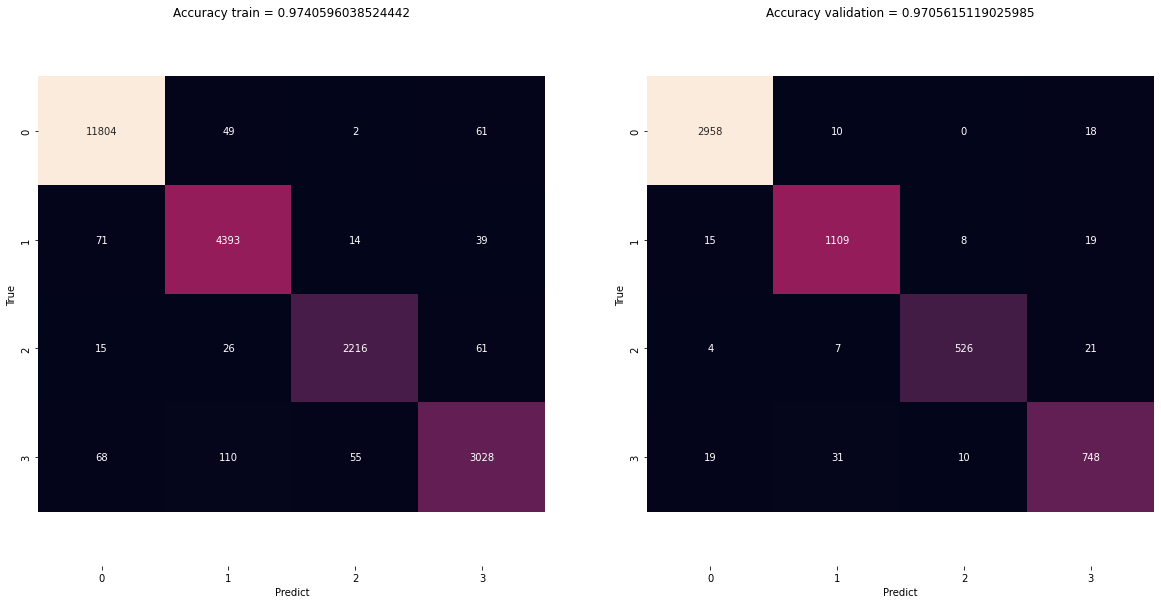

In [ ]:
con_mat(cont_XGB, conv_XGB)
figure.savefig('conf_xgb.png', dpi=1000)

Training Report XGB

In [ ]:
cv_xgb = cross_val_score(estimator = CV_xgb_model, X = X_train, y = y_train, cv = 10)

y_pred_xgb_train = CV_xgb_model.predict(X_train)
r2_score_xgb_train = r2_score(y_train, y_pred_xgb_train)

y_pred_xgb_test = CV_xgb_model.predict(X_val)
r2_score_xgb_test = r2_score(y_val, y_pred_xgb_test)

rmse_xgb = (np.sqrt(mean_squared_error(y_val, y_pred_xgb_test)))
print("CV: ", cv_xgb.mean())
print('R2_score (train): ', r2_score_xgb_train)
print('R2_score (test): ', r2_score_xgb_test)
print("RMSE: ", rmse_xgb)

CV:  0.9676544927765887
R2_score (train):  0.9217450845674441
R2_score (test):  0.9068535452689597
RMSE:  0.3356572934473133


In [ ]:
f1_score_xgb_training = metrics.accuracy_score(y_train, y_pred_xgb_train)
f1_score_xgb_testing = metrics.accuracy_score(y_val, y_pred_xgb_test)

In [ ]:
print('The accuracy of the XGBoost Training Set using all variables is:',accuracy(cont_XGB))  
print (classification_report(y_train, y_pred_xgb_train))

print('The accuracy of the XGBoost Testing Set using all variables is:',accuracy(conv_XGB))  
print (classification_report(y_val, y_pred_xgb_test))

The accuracy of the XGBoost Training Set using all variables is: 0.9740596038524442
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11916
           1       0.96      0.97      0.97      4517
           2       0.97      0.96      0.96      2318
           3       0.95      0.93      0.94      3261

    accuracy                           0.97     22012
   macro avg       0.97      0.96      0.96     22012
weighted avg       0.97      0.97      0.97     22012

The accuracy of the XGBoost Testing Set using all variables is: 0.9705615119025985
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2986
           1       0.96      0.96      0.96      1151
           2       0.97      0.94      0.95       558
           3       0.93      0.93      0.93       808

    accuracy                           0.97      5503
   macro avg       0.96      0.96      0.96      5503
weighted avg      

In [ ]:
X_target = test[feature].values

scaled_target_xgb = scaler.transform(X_target)
predtarget_xgb = CV_xgb_model.predict(scaled_target_xgb)

test['pred_xgb'] = predtarget_xgb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


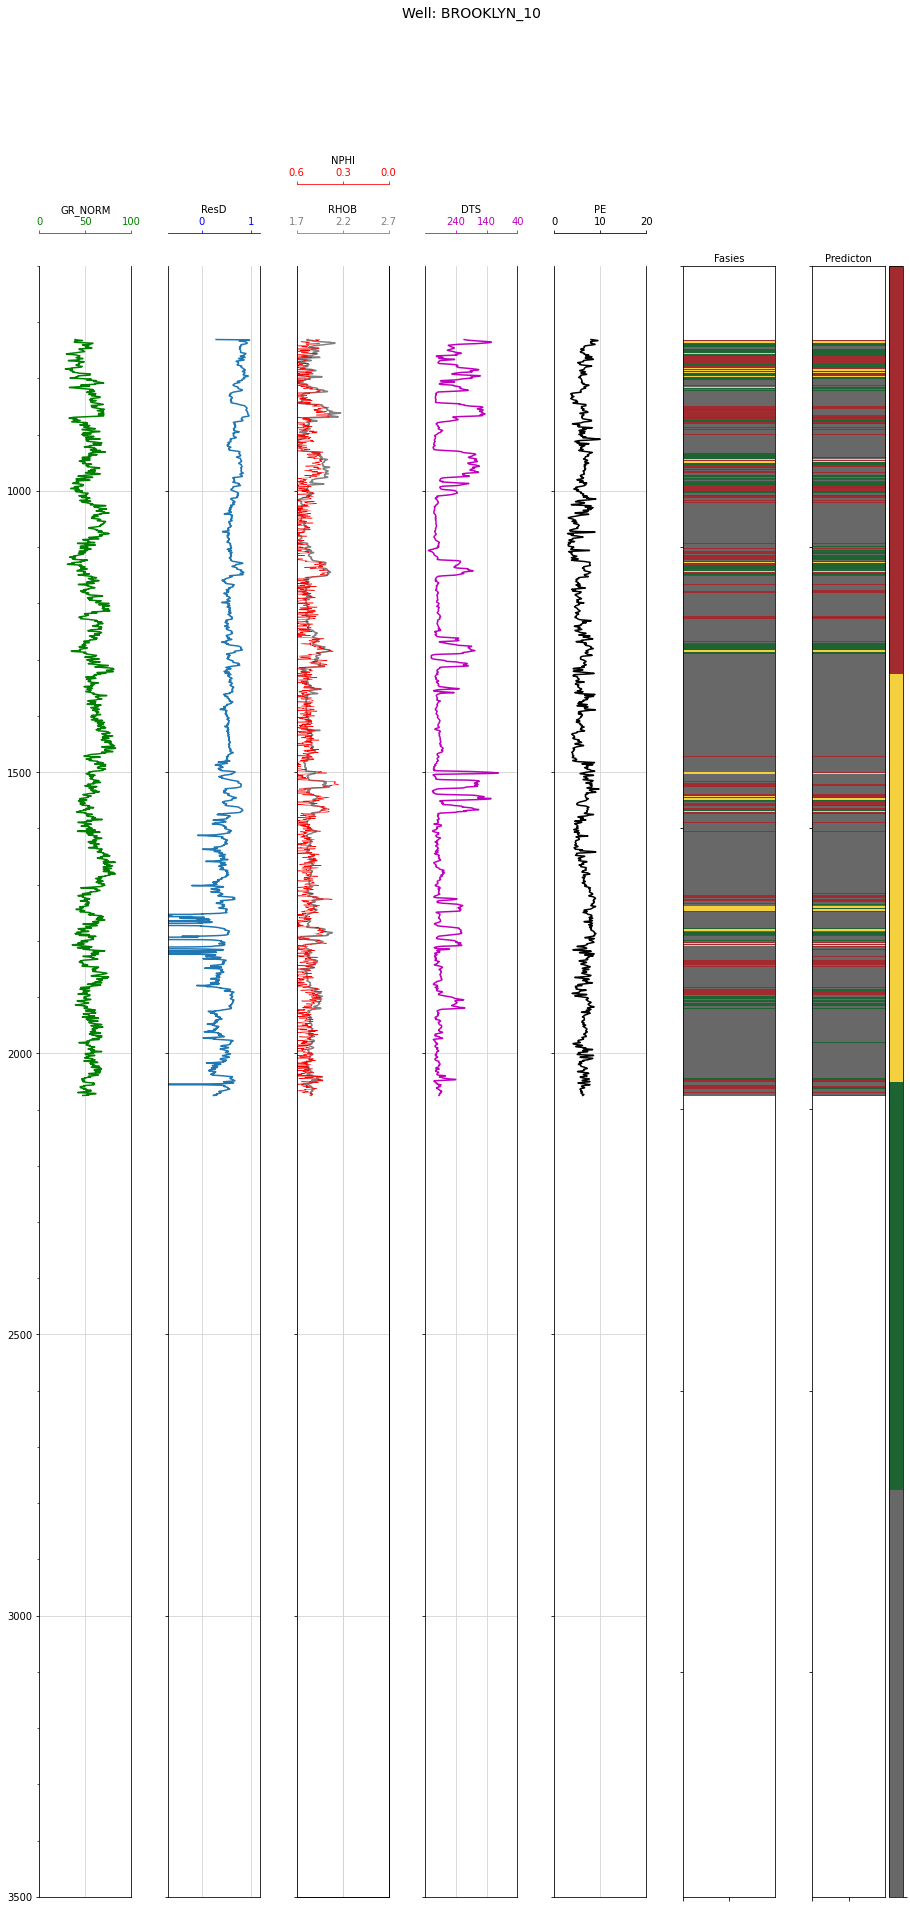

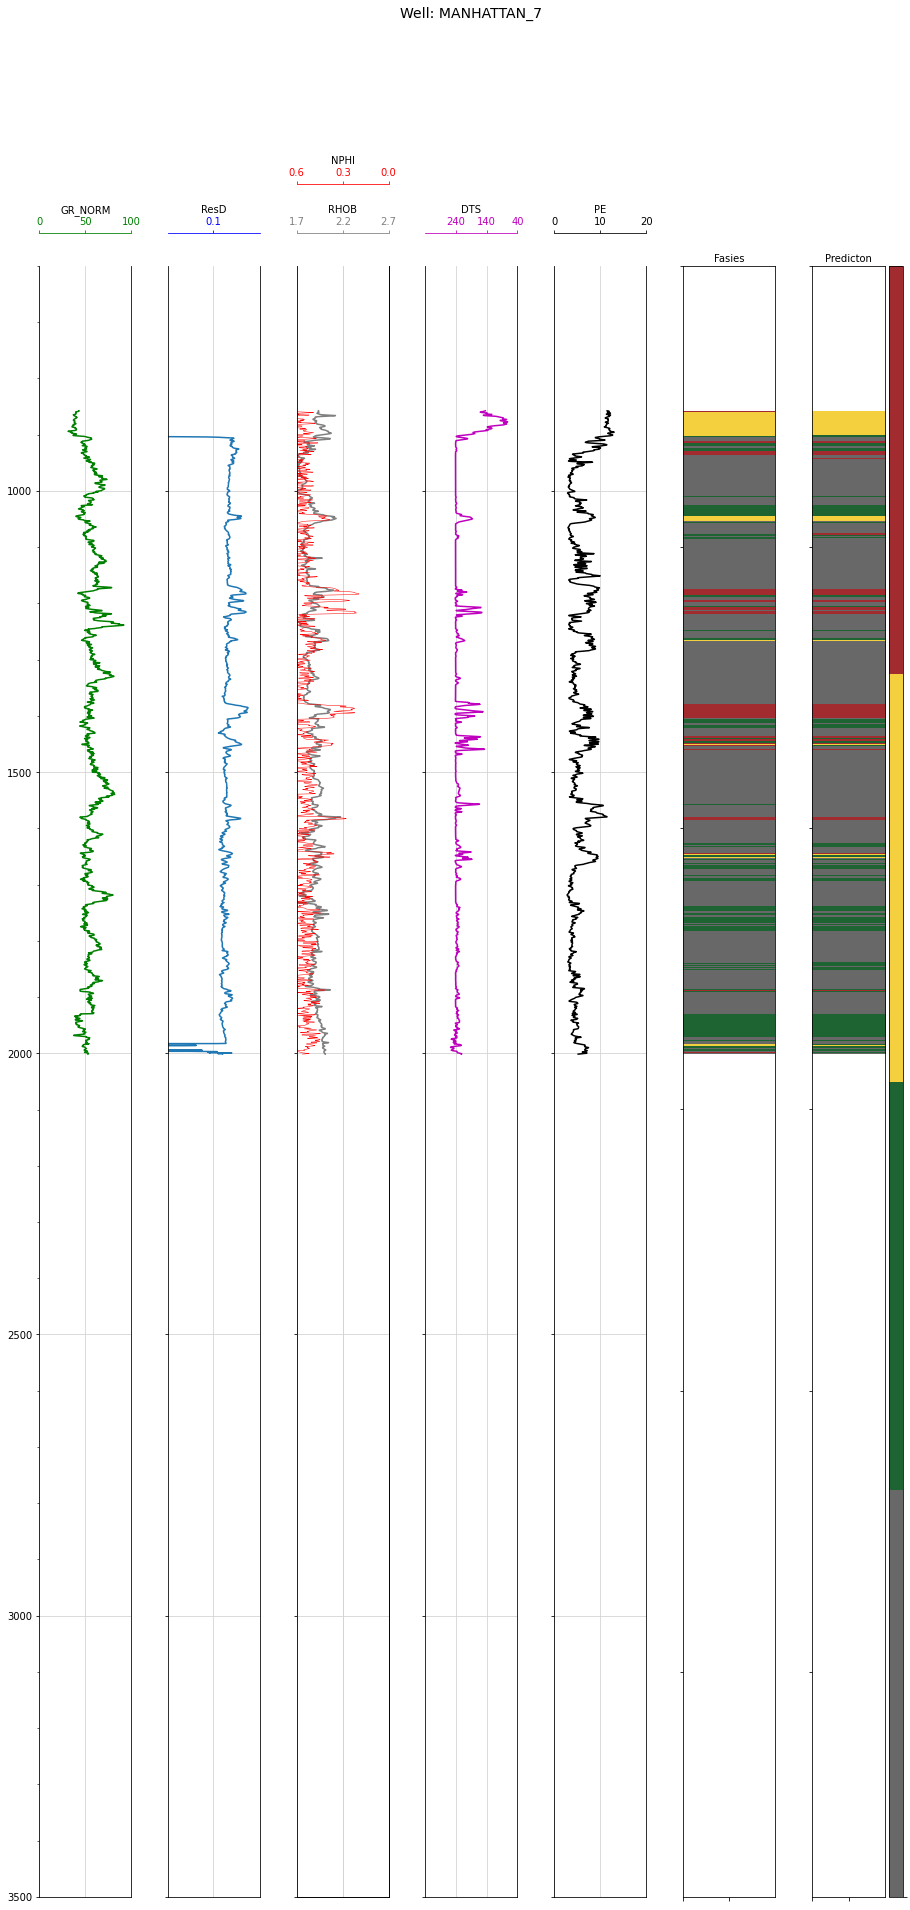

In [ ]:
for i in np.unique(test['WELL']):
  make_facies_log_plot(
      test[test['WELL']==i],
      facies_colors=facies_colors, target = target_test[target_test['WELL']==i] ,pred = 'pred_xgb')

Comparison

In [ ]:
models = [('SVM Classification', f1_score_svm_training, f1_score_svm_testing, rmse_svm, r2_score_svm_train, r2_score_svm_test, cv_svm.mean()),
         ('Random Forest Classification', f1_score_rf_training, f1_score_rf_testing, rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
         ('XGBoost Classification', f1_score_xgb_training, f1_score_xgb_testing, rmse_xgb, r2_score_xgb_train, r2_score_xgb_test, cv_xgb.mean()),      
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'F1-Score(train)', 'F1-Score(test)','RMSE', 'R2_Score(train)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,F1-Score(train),F1-Score(test),RMSE,R2_Score(train),R2_Score(test),Cross-Validation
0,SVM Classification,0.996366,0.974378,0.301128,0.989161,0.925032,0.967018
1,Random Forest Classification,1.000000,0.983282,0.261393,1.000000,0.943511,0.981374
2,XGBoost Classification,0.974060,0.970562,0.335657,0.921745,0.906854,0.967654


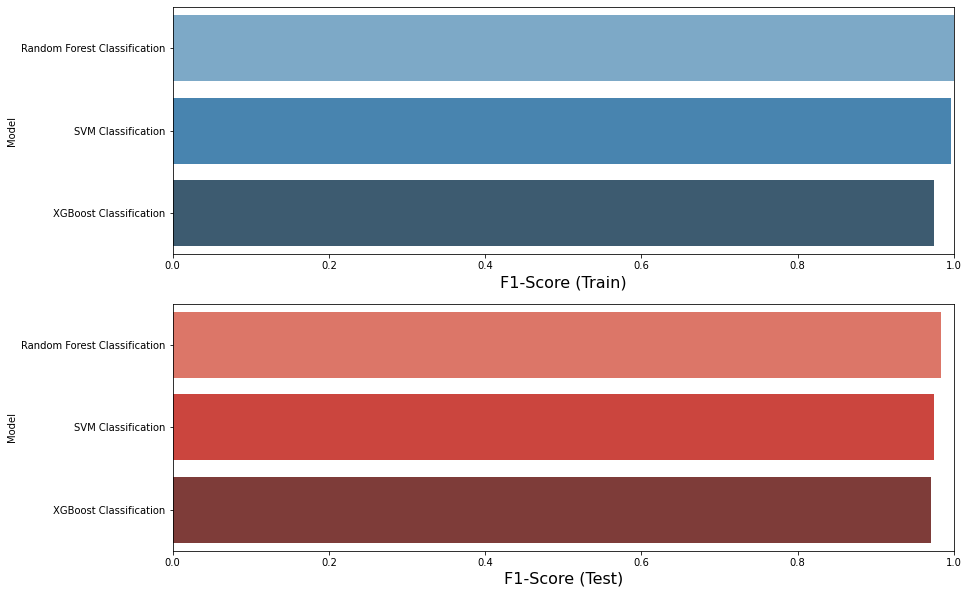

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['F1-Score(train)'], ascending=False, inplace=True)

sns.barplot(x='F1-Score(train)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('F1-Score (Train)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['F1-Score(test)'], ascending=False, inplace=True)

sns.barplot(x='F1-Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('F1-Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

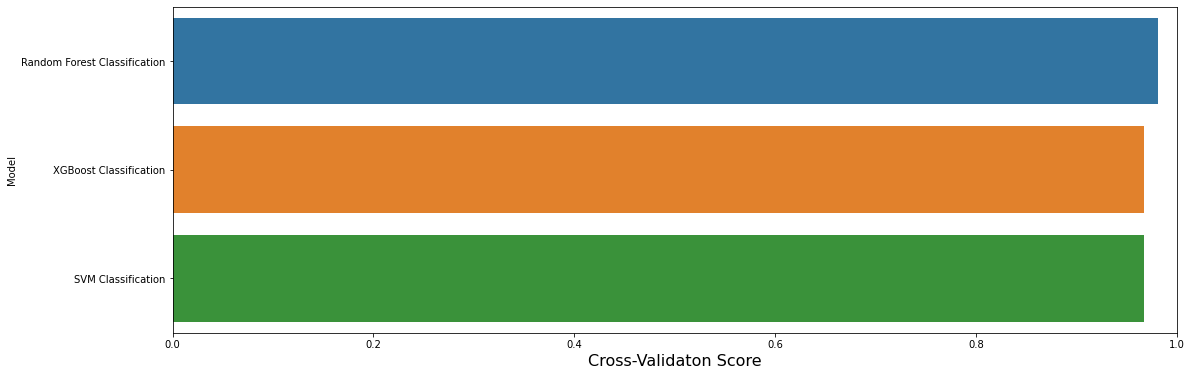

In [ ]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

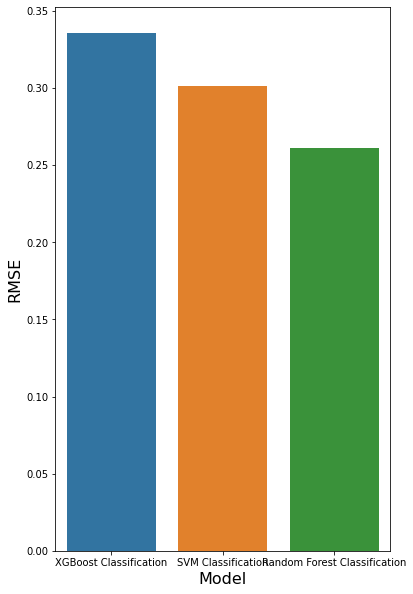

In [ ]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(6,10))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:267: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:267: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


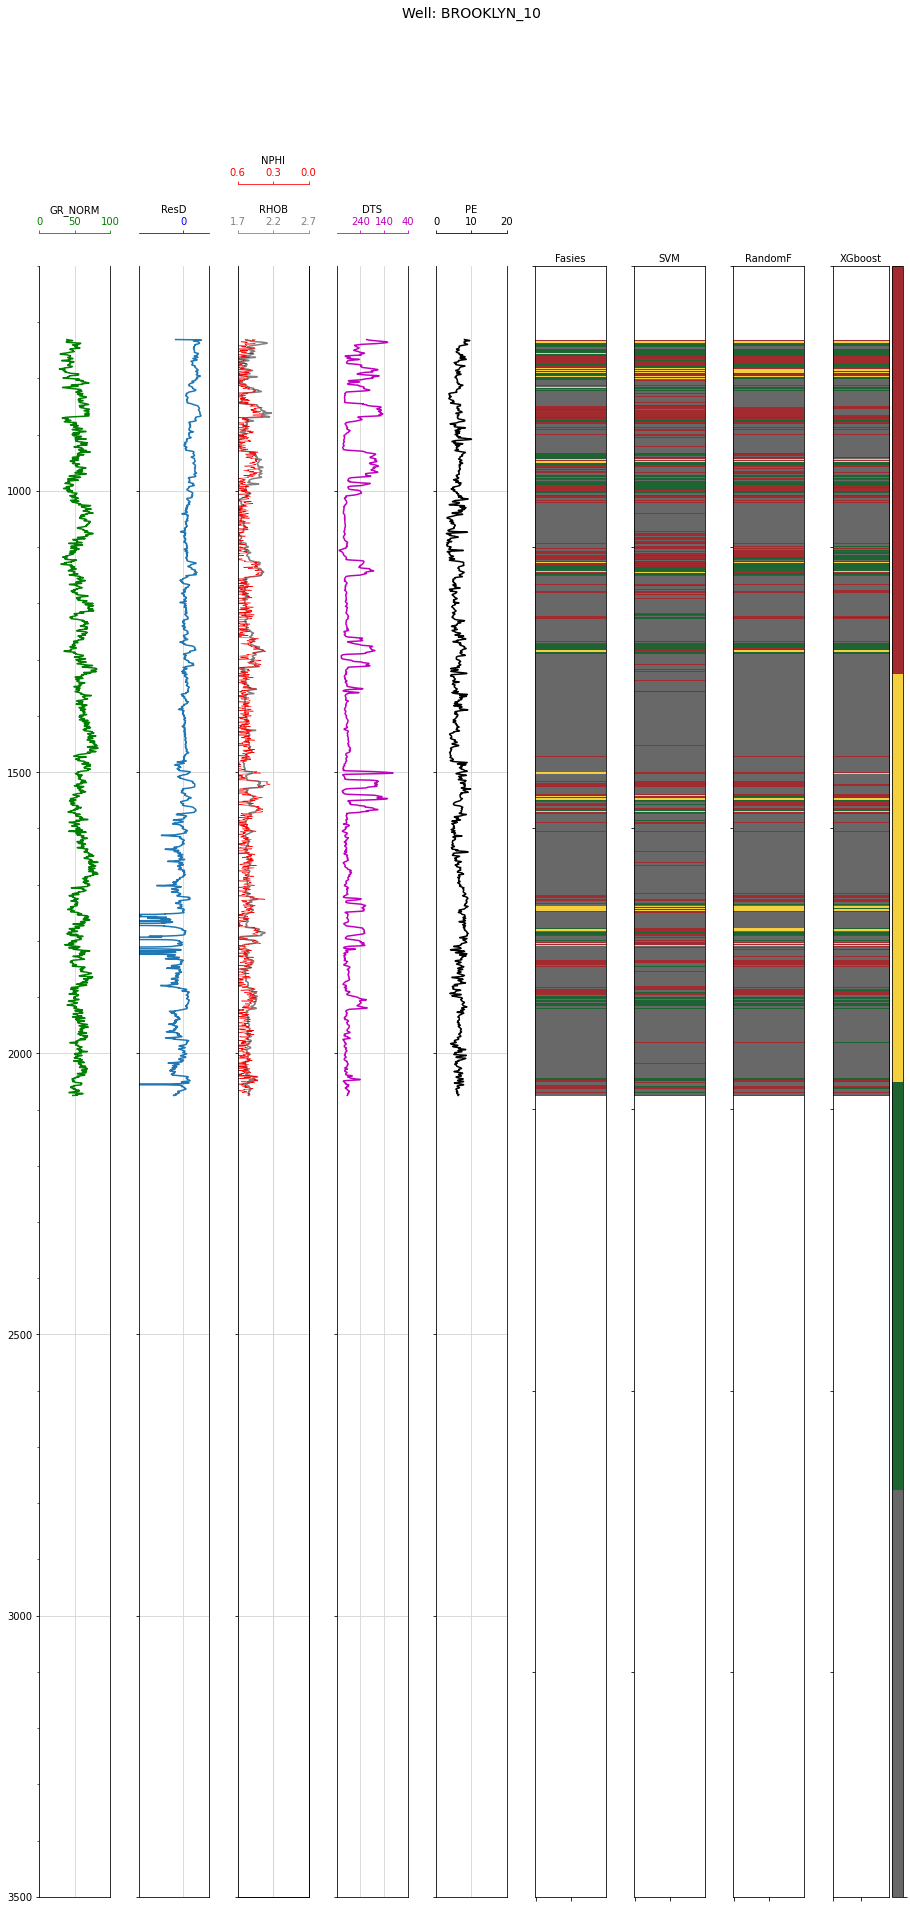

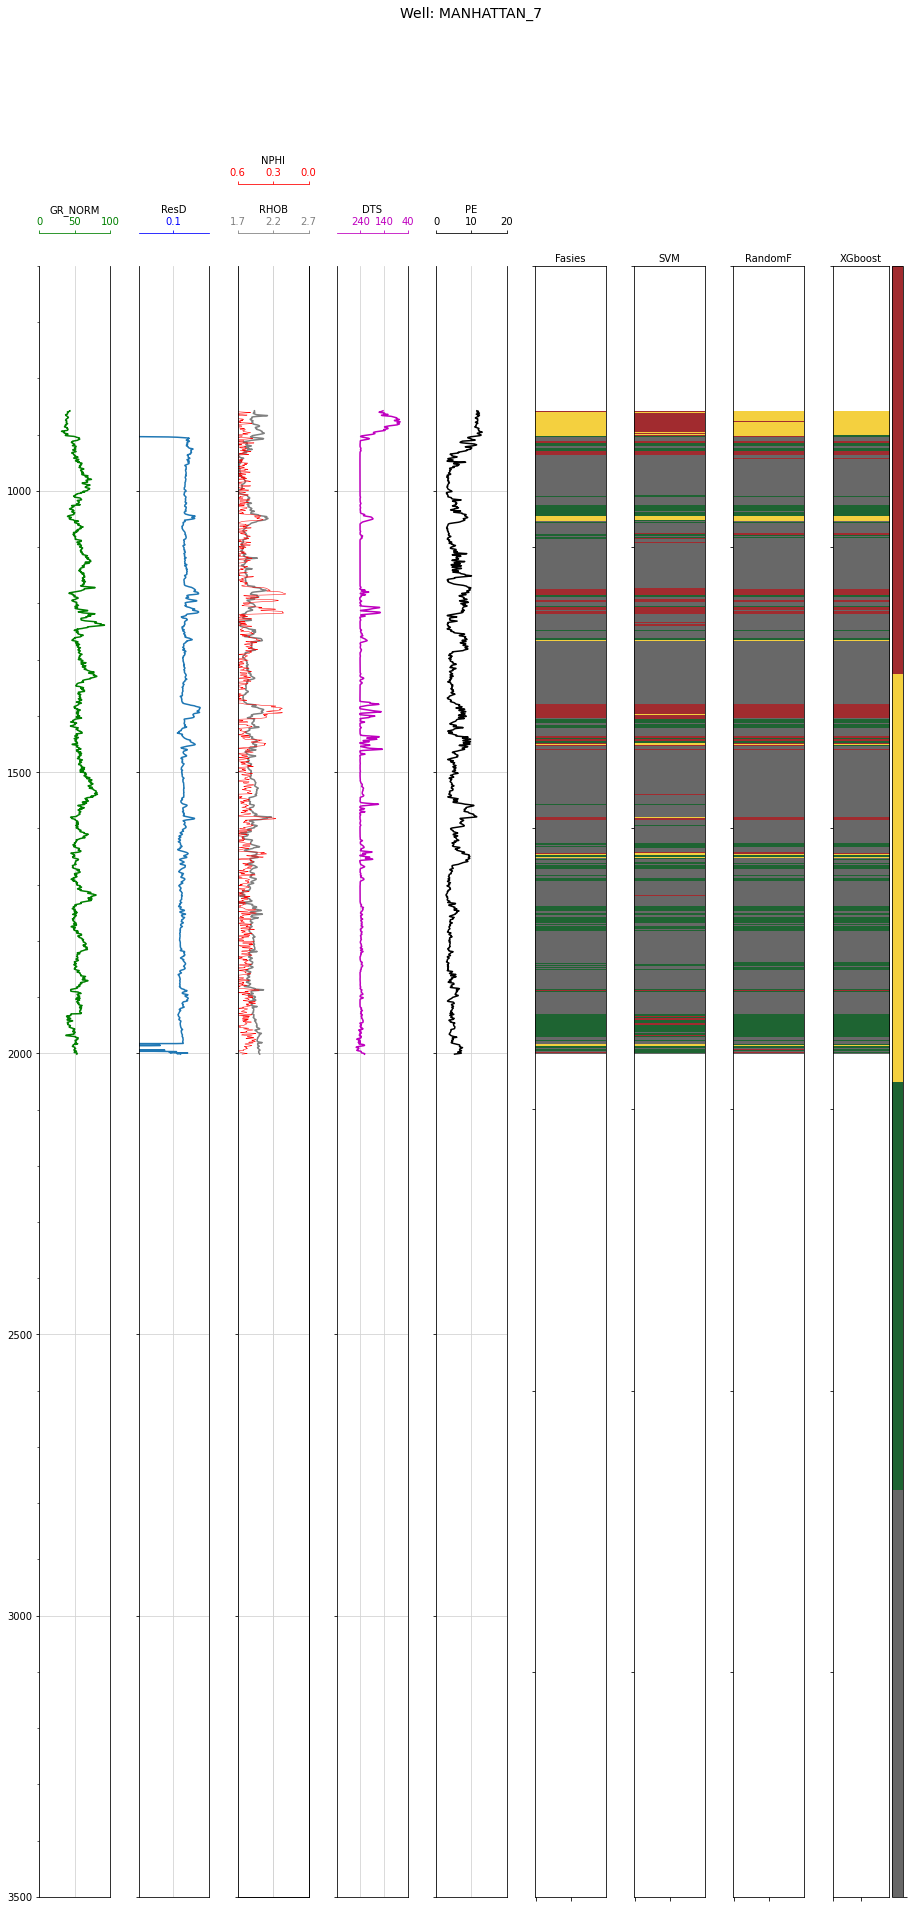

In [ ]:
for i in np.unique(test['WELL']):
  make_facies_log_plot_all(
      test[test['WELL']==i],
      facies_colors=facies_colors, target = target_test[target_test['WELL']==i] ,pred = ['pred_SVM','pred_RF','pred_xgb'])